In [31]:
import numpy as np
from time import time
import os
import sys
import scipy
import math
import json
import re
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import shift
import pandas as pd
import psutil
from tqdm import tqdm
sys.path.insert(0, '/hominterp1de/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
#import ants
import bigbadbrain as bbb
from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import cv2

import statsmodels.api as sm

%matplotlib inline

### Load Fictrac Data

In [4]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'
fly_folders = [os.path.join(root_directory,x) for x in os.listdir(root_directory) if 'fly' in x]
bbb.sort_nicely(fly_folders)
fly_folders = fly_folders[::-1]
fictrac = {}
for fly in fly_folders:
    expt_folders = []
    expt_folders = [os.path.join(fly,x) for x in os.listdir(fly) if 'func' in x]
    if len(expt_folders) > 0:
        for expt_folder in expt_folders:
            try:
                fly_num = os.path.split(fly)[-1]
                expt_num = os.path.split(expt_folder)[-1]
                this_expt = '{},{}'.format(fly_num, expt_num)
                fictrac[this_expt] = bbb.load_fictrac(os.path.join(expt_folder, 'fictrac'))
            except:
                print('FAIL: {}'.format(expt_folder))


~~ load_fictrac ~~
FAIL: /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_69/func_0

~~ load_fictrac ~~
load_fictrac done. Duration: 3.47 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 5.23 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.73 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.37 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.69 sec

~~ load_fictrac ~~
FAIL: /oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_49/func_0

~~ load_fictrac ~~
load_fictrac done. Duration: 3.58 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.96 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.19 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.58 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 5.51 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 5.57 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.27 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 5.18 sec

~~ load_fictrac

In [4]:
good_flies = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23,24,25,26,31,43,44,45,46,47,48,49,51,52,53,54,68,69]

In [8]:
for i in fictrac:
    print(i)

fly_68,func_0
fly_54,func_0
fly_53,func_0
fly_52,func_0
fly_51,func_0
fly_48,func_0
fly_47,func_0
fly_46,func_0
fly_46,func_1
fly_45,func_0
fly_44,func_0
fly_43,func_0
fly_43,func_1
fly_43,func_2
fly_42,func_1
fly_41,func_0
fly_40,func_0
fly_39,func_0
fly_39,func_1
fly_38,func_0
fly_38,func_1
fly_37,func_0
fly_37,func_2
fly_36,func_0
fly_36,func_1
fly_35,func_2
fly_34,func_0
fly_34,func_1
fly_33,func_0
fly_33,func_1
fly_30,func_0
fly_29,func_0
fly_28,func_0
fly_27,func_0
fly_26,func_0
fly_25,func_0
fly_24,func_0
fly_23,func_0
fly_22,func_0
fly_21,func_0
fly_20,func_0
fly_19,func_0
fly_18,func_0
fly_17,func_0
fly_14,func_0
fly_13,func_0
fly_12,func_0
fly_11,func_0
fly_10,func_0
fly_9,func_0
fly_8,func_0
fly_7,func_0
fly_6,func_0
fly_5,func_0
fly_4,func_0
fly_3,func_0
fly_2,func_0
fly_1,func_0


In [19]:
fictrac_good = {}
for i,expt in enumerate(fictrac):
    try:
        fly_num = int(expt.split('_')[1].split(',')[0])
        if fly_num in good_flies:
            fictrac_good[expt] = fictrac[expt]
            print('GOOD: {}'.format(expt))
        else:
            print('BAD: {}'.format(expt))
    except:
        print('FAIL: {}'.format(expt))

GOOD: fly_68,func_0
GOOD: fly_54,func_0
GOOD: fly_53,func_0
GOOD: fly_52,func_0
GOOD: fly_51,func_0
GOOD: fly_48,func_0
GOOD: fly_47,func_0
GOOD: fly_46,func_0
GOOD: fly_46,func_1
GOOD: fly_45,func_0
GOOD: fly_44,func_0
GOOD: fly_43,func_0
GOOD: fly_43,func_1
GOOD: fly_43,func_2
BAD: fly_42,func_1
BAD: fly_41,func_0
BAD: fly_40,func_0
BAD: fly_39,func_0
BAD: fly_39,func_1
BAD: fly_38,func_0
BAD: fly_38,func_1
BAD: fly_37,func_0
BAD: fly_37,func_2
BAD: fly_36,func_0
BAD: fly_36,func_1
BAD: fly_35,func_2
BAD: fly_34,func_0
BAD: fly_34,func_1
BAD: fly_33,func_0
BAD: fly_33,func_1
BAD: fly_30,func_0
BAD: fly_29,func_0
BAD: fly_28,func_0
BAD: fly_27,func_0
GOOD: fly_26,func_0
GOOD: fly_25,func_0
GOOD: fly_24,func_0
GOOD: fly_23,func_0
GOOD: fly_22,func_0
GOOD: fly_21,func_0
BAD: fly_20,func_0
GOOD: fly_19,func_0
BAD: fly_18,func_0
GOOD: fly_17,func_0
GOOD: fly_14,func_0
GOOD: fly_13,func_0
GOOD: fly_12,func_0
GOOD: fly_11,func_0
GOOD: fly_10,func_0
GOOD: fly_9,func_0
GOOD: fly_8,func_0
GOOD

In [16]:
fictrac_good['fly_1,func_0']

array([[0.0, 0.0, 0.0, ..., 0.0, 1545091026853.8, '0'],
       [1.0, -0.0012584658949666, -0.00012644442466438, ...,
        -0.00057550358347725, 1545091026872.5, '1'],
       [2.0, 0.00092395318380066, -0.0020800147369637, ...,
        -0.00058669565876347, 1545091026892.5, '2'],
       ...,
       [89997.0, 0.0005346977376233, -0.00020704146977578, ...,
        397.20418966919, 1545092826822.7, '89997'],
       [89998.0, -0.0053239634512654, -0.011976472286981, ...,
        397.19667381616, 1545092826842.6, '89998'],
       [89999.0, -0.0015274397034627, -0.00011477574891487, ...,
        397.19507489365, 1545092826862.6, '89999']], dtype=object)

In [ ]:
import matplotlib as mpl

In [21]:
fic_v = []
fictrac_good_processed = {}
sphere_radius = 4.5e-3
for fly in fictrac_good:
    dx = np.asarray(fictrac_good[fly]['dRotLabX'])
    dy = np.asarray(fictrac_good[fly]['dRotLabY'])
    dz = np.asarray(fictrac_good[fly]['dRotLabZ'])
    # Starts as radians per 20ms
    dx = scipy.ndimage.filters.gaussian_filter(dx,sigma=3) * sphere_radius * 50 * 100
    dy = scipy.ndimage.filters.gaussian_filter(dy,sigma=3) * sphere_radius * 50 * 100
    dz = scipy.ndimage.filters.gaussian_filter(dz,sigma=3) * 180 / np.pi * 50 # now deg/sec
    # now in cm per sec
    
    fictrac_good_processed[fly] = {'dx': dx, 'dy': dy, 'dz': dz}
    
    #fic_v.append(np.sqrt(dx*dx + dy*dy + dz*dz))

In [ ]:
plt.figure(figsize=(10,10))
for i,fly in enumerate(fictrac_good_processed):
    plt.subplot(6,6,i+1)
    plt.hist2d(fictrac_good_processed[fly]['dy'],
               fictrac_good_processed[fly]['dz'],
               bins=[17,40],cmap='Blues',norm=mpl.colors.LogNorm());
    plt.ylim(-200,200)
    plt.xlim(-1,2)
    plt.title('{}'.format(fly))

(-0.01, 0.01)

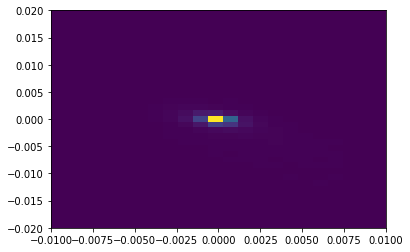

In [31]:
plt.hist2d(fictrac_good_processed['fly_1,func_0']['dy'],
           fictrac_good_processed['fly_1,func_0']['dx'],
           bins=100);
plt.ylim(-0.02,0.02)
plt.xlim(-0.01,0.01)

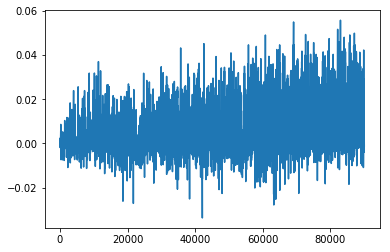

In [26]:
plt.plot(fictrac_good_processed['fly_1,func_0']['dy'])
#plt.xlim(0,1000)

In [ ]:
def interp_fictrac(fictrac, fps, resolution, expt_len):
    behavior = 'dRotLabY'
    sigma = 0
    camera_rate = 1/fps * 1000 # camera frame rate in ms
    
    x_original = np.arange(0,expt_len,camera_rate)
    # 20ms resolution
    fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(fictrac[behavior]),25,3)
    #fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=sigma)
    fictrac_smoothed = np.abs(fictrac_smoothed)
    fictrac_interp_temp = interp1d(x_original, fictrac_smoothed, bounds_error = False)
    xnew = np.arange(0,expt_len,resolution) #0 to last time at subsample res
    fictrac_interp = fictrac_interp_temp(xnew)

    # Replace Nans with zeros (for later code)
    np.nan_to_num(fictrac_interp, copy=False);
    
    return fictrac_interp

resolution = 10 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
fictrac_interp = interp_fictrac(fictrac, fps, resolution, expt_len)
xnew = np.arange(0,expt_len,resolution)

### BIGRIG

In [2]:
#####################
###  Define Data  ###
#####################

Path = '/oak/stanford/groups/trc/data/Brezovec/VRArena/exps'
#Path = '/scratch/users/brezovec/exps'

Expts = ['exp-20181102-165424',
         'exp-20181102-175232',
         'exp-20181103-184106',
         'exp-20181104-162518',
         'exp-20181105-115608',
         'exp-20181107-181316',
         'exp-20181108-111101',
         'exp-20181108-143044',
         'exp-20181109-084314']

#Expts = ['exp-20181031-190938']

In [3]:
###########################
###  Define Trial Class ###
###########################

class Trial:
    def __init__ (self, dirName):
        print('Importing from: {}'.format(Path))
        self.cam = Cam(os.path.join(dirName, 'cam.txt'))
        self.cnc = Cnc(os.path.join(dirName, 'cnc.txt'))
        self.stimuli = Stimuli(os.path.join(dirName, 'stimuli.txt'), mode='static_stim')
        
class Cam:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(3,))
        self.pvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,), dtype=bool)
        self.avec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(6,))

class Cnc:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))

class Stimuli:
    def __init__ (self, fname, mode):
        print(fname)
        
        if mode == 'static_stim':
            self.dict = stim_parser(fname)
            
        elif mode == 'moving_stim':
            with open(fname) as file:  
                data = file.read() 
            d=data.split('@')
            newStimTimes = [item for item in d if 'NewStim' in item]
            updateStimTimes = [item for item in d if 'UpdateStim' in item]
            StimTimesMessy = newStimTimes + updateStimTimes
            StimTimes = [float(item.split(' ')[0]) for item in StimTimesMessy]
            self.stimtimes = StimTimes

            ratesMessy = [item.split('\n') for item in StimTimesMessy]
            rates_nice = [item for sublist in ratesMessy for item in sublist]
            rates_only = [item for item in rates_nice if 'rate' in item]
            rates = [int(item.split(' ')[3]) for item in rates_only]
            self.rates = rates
            
        else:
            assert('invalid stimuli mode')
        
## For importing files in correct order:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [tryint(c) for c in re.split('([0-9]+)', s)]

def sort_nicely(x):
    x.sort(key=alphanum_key)
    
def stim_parser(fname):
    with open(fname) as file:  
        data = file.read() 
    d = data.split('\n')
    kv_pair = [item for item in d if ':' in item and '@' not in item]
    stim_dict = {}
    for item in kv_pair:
        key = item.split(':')[0]
        value = item.split(':')[1]
        key = re.sub(" |'|\"|,", "", key)
        value = re.sub(" |'|\"|,", "", value)
        stim_dict[key] = value
    return stim_dict

In [4]:
#####################
###  Import Data  ###
#####################

trials = []        
for expt in Expts:
    dirNames = os.listdir(os.path.join(Path, expt))
    dirNames = [x for x in dirNames if 'trial' in x]
    sort_nicely(dirNames)
    trials.append(([Trial(os.path.join(Path, expt, dirName)) for dirName in dirNames]))
trials = [item for sublist in trials for item in sublist]

Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-3-20181102-170301/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-2018

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-15-20181103-194919/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/stimuli.txt
Importing from

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-30-20181105-150628/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-21-20181107-191239/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-21-20181107-191239/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-18-20181108-120438/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-16-20181108-155314/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-4-20181109-090724/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-

In [5]:
########################
### Define Fly Class ###
########################

class Fly:
    def __init__ (self,trial,time_res=0.01,sigma=0):
        mode = 'static_stim'
        if np.any(trial.cam.pvec):
            # Get cam data (only time points where pvec is true, aka fly is present)
            camt = trial.cam.tvec[trial.cam.pvec]
            #Interpolate
            cama = interp1d(camt, trial.cam.avec[trial.cam.pvec],kind='nearest')
            camx = interp1d(camt, trial.cam.xvec[trial.cam.pvec])
            camy = interp1d(camt, trial.cam.yvec[trial.cam.pvec])
            # Get cnc data
            cncx = interp1d(trial.cnc.tvec, trial.cnc.xvec)
            cncy = interp1d(trial.cnc.tvec, trial.cnc.yvec)
            tmin = max(camt[0], trial.cnc.tvec[0])
            tmax = min(camt[-1], trial.cnc.tvec[-1])
            # Pull from interpolated data at chosen time resolution, and add camera and cnc positions
            self.t = np.arange(tmin, tmax, time_res)
            self.x = camx(self.t) + cncx(self.t)
            self.y = camy(self.t) + cncy(self.t)
            self.a = cama(self.t)
            # Unwrap angles and rotate
            self.angleUnwrapper()
            #self.a=angleChangeOrigin(self.a)
            self.a = 90-self.a #rotate angles 90deg to change ellipse fitting defined angles
            self.a = -self.a #flip angle horizontally due to camera flip
            # Smooth if asked to
            if sigma is not 0:
                self.x = scipy.ndimage.filters.gaussian_filter1d(self.x,sigma)
                self.y = scipy.ndimage.filters.gaussian_filter1d(self.y,sigma)
                self.a = scipy.ndimage.filters.gaussian_filter1d(self.a,sigma)
            self.tvid = self.t - camt[0] #for video debugging
            self.velocity()
            x_covered = np.sum(np.abs(np.diff(self.x)))
            y_covered = np.sum(np.abs(np.diff(self.y)))
            self.dist_covered = x_covered + y_covered
            self.duration = self.t[-1]-self.t[0]
            self.a_covered = np.sum(np.abs(np.diff(self.a)))
            
            if mode == 'static_stim':
                self.stimdict = trial.stimuli.dict

            elif mode == 'moving_stim':
                self.stimtimes = trial.stimuli.stimtimes
                self.rates = trial.stimuli.rates
            
        else:
            self.t = None
            self.x = None
            self.y = None
            self.a = None
            self.v = None
            self.tvid = None    
    def angleUnwrapper(self):
        jumpThresh=150
        angles=[]
        angle_offset=0
        for k, angle in enumerate(self.a):
            if k == 0:
                angles.append(angle)
                continue
            angle += angle_offset
            if angles[-1]-angle > jumpThresh:
                angle_offset += 180
                angle += 180
            elif angle-angles[-1] > jumpThresh:
                angle_offset -= 180
                angle -= 180
            angles.append(angle)
        self.a = np.array(angles)
    def velocity(self):
        x1 = self.x
        y1 = self.y
        a1 = self.a
        x2 = shift(x1,-1,cval=np.NaN)
        y2 = shift(y1,-1,cval=np.NaN)
        a2 = shift(a1,-1,cval=np.NaN)
        # Calculate velocity
        dist = (((x2-x1)**2)+((y2-y1)**2))**0.5
        self.v = dist[:-2]
        #
        vel_x = x2-x1
        self.vx = vel_x[:-2]
        vel_y = y2-y1
        self.vy = vel_y[:-2]
        # Calculate angle of velocity
        #velocity_angle = np.rad2deg(np.arctan2((y2-y1),(x2-x1)))
        #fly_angle = self.a%(360)
        #angle_difference = velocity_angle-fly_angle
        #forward_component = (np.cos(angle_difference*np.pi/180))
        #self.vf = forward_component[:-2]
        #self.va = velocity_angle[:-2]
        # Calculate angular velocity
        angular_velocity = a2-a1
        self.av = angular_velocity[:-2]

class FlyArrow:
    def __init__ (self,fly,scale,flip=False):
        if np.any(fly.x):
            if flip is True:
                fly.a = fly.a + 180
            self.x1 = fly.x-np.cos(fly.a*np.pi/180)*scale
            self.x2 = fly.x+np.cos(fly.a*np.pi/180)*scale
            self.y1 = fly.y-np.sin(fly.a*np.pi/180)*scale
            self.y2 = fly.y+np.sin(fly.a*np.pi/180)*scale
        else:
            self.x1 = None
            self.x2 = None
            self.y1 = None
            self.y2 = None            

# def angleChangeOrigin(a):
#     if a[0] <= 90:
#         a=90-a+90
#     if a[0] >90:
#         a=270-a+90
#     return a            
            
# def smooth(x,sigma):
#     x = scipy.ndimage.filters.gaussian_filter1d(x,sigma)
#     return x

In [113]:
#################################################
### Create fly class and pull from trial data ###
#################################################

class Fly:
    def __init__ (self,trial,time_res=0.01,sigma=0):
        if np.any(trial.cam.pvec):
            # Get cam data (only time points where pvec is true, aka fly is present)
            camt = trial.cam.tvec
            #Interpolate
            cama = interp1d(camt, trial.cam.avec,kind='nearest')
            camx = interp1d(camt, trial.cam.xvec)
            camy = interp1d(camt, trial.cam.yvec)
            # Get cnc data
            cncx = interp1d(trial.cnc.tvec, trial.cnc.xvec)
            cncy = interp1d(trial.cnc.tvec, trial.cnc.yvec)
            tmin = max(camt[0], trial.cnc.tvec[0])
            tmax = min(camt[-1], trial.cnc.tvec[-1])
            # Pull from interpolated data at chosen time resolution, and add camera and cnc positions
            self.t = np.arange(tmin, tmax, time_res)
            self.x = camx(self.t) + cncx(self.t)
            self.y = camy(self.t) + cncy(self.t)
            self.a = cama(self.t)
            # Unwrap angles and rotate
            self.angleUnwrapper()
            #self.a=angleChangeOrigin(self.a)
            self.a = 90-self.a #rotate angles 90deg to change ellipse fitting defined angles
            self.a = -self.a #flip angle horizontally due to camera flip
            # Smooth if asked to
            if sigma is not 0:
                self.x = scipy.ndimage.filters.gaussian_filter1d(self.x,sigma)
                self.y = scipy.ndimage.filters.gaussian_filter1d(self.y,sigma)
                self.a = scipy.ndimage.filters.gaussian_filter1d(self.a,sigma)
            self.tvid = self.t - camt[0] #for video debugging
            self.velocity()
        else:
            self.t = None
            self.x = None
            self.y = None
            self.a = None
            self.v = None
            self.tvid = None    
    def angleUnwrapper(self):
        jumpThresh=150
        angles=[]
        angle_offset=0
        for k, angle in enumerate(self.a):
            if k == 0:
                angles.append(angle)
                continue
            angle += angle_offset
            if angles[-1]-angle > jumpThresh:
                angle_offset += 180
                angle += 180
            elif angle-angles[-1] > jumpThresh:
                angle_offset -= 180
                angle -= 180
            angles.append(angle)
        self.a = np.array(angles)
    def velocity(self):
        x1 = self.x
        y1 = self.y
        a1 = self.a
        x2 = shift(x1,-1,cval=np.NaN)
        y2 = shift(y1,-1,cval=np.NaN)
        a2 = shift(a1,-1,cval=np.NaN)
        # Calculate velocity
        dist = (((x2-x1)**2)+((y2-y1)**2))**0.5
        self.v = dist[:-2]
        #
        vel_x = x2-x1
        self.vx = vel_x[:-2]
        vel_y = y2-y1
        self.vy = vel_y[:-2]
        # Calculate angle of velocity
        velocity_angle = np.rad2deg(np.arctan2((y2-y1),(x2-x1)))
        #fly_angle = self.a%(360)
        #angle_difference = velocity_angle-fly_angle
        #forward_component = (np.cos(angle_difference*np.pi/180))
        #self.vf = forward_component[:-2]
        self.va = velocity_angle[:-2]
        # Calculate angular velocity
        angular_velocity = a2-a1
        self.av = angular_velocity[:-2]

class FlyArrow:
    def __init__ (self,fly,scale,flip=False):
        if np.any(fly.x):
            if flip is True:
                fly.a = fly.a + 180
            self.x1 = fly.x-np.cos(fly.a*np.pi/180)*scale
            self.x2 = fly.x+np.cos(fly.a*np.pi/180)*scale
            self.y1 = fly.y-np.sin(fly.a*np.pi/180)*scale
            self.y2 = fly.y+np.sin(fly.a*np.pi/180)*scale
        else:
            self.x1 = None
            self.x2 = None
            self.y1 = None
            self.y2 = None            

# def angleChangeOrigin(a):
#     if a[0] <= 90:
#         a=90-a+90
#     if a[0] >90:
#         a=270-a+90
#     return a            
            
# def smooth(x,sigma):
#     x = scipy.ndimage.filters.gaussian_filter1d(x,sigma)
#     return x

In [6]:
###################
### BUILD FLIES ###
###################

flies = [Fly(trial,sigma=10) for trial in trials]

In [7]:
################################################
### Assign fly types based on visual stimuli ###
################################################

for fly in flies:
    if fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.0':
        fly.type = 'dark'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.5':
        fly.type = 'grey'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '1.0':
        fly.type = 'bright'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '0':
        fly.type = 'vertical'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '90':
        fly.type = 'horizontal'
    elif fly.stimdict['name'] == 'RandomGrid':
        fly.type = 'checker'
    else:
        print('Did not assign type to fly with stimuli name: {}'.format(fly.stimdict['name']))

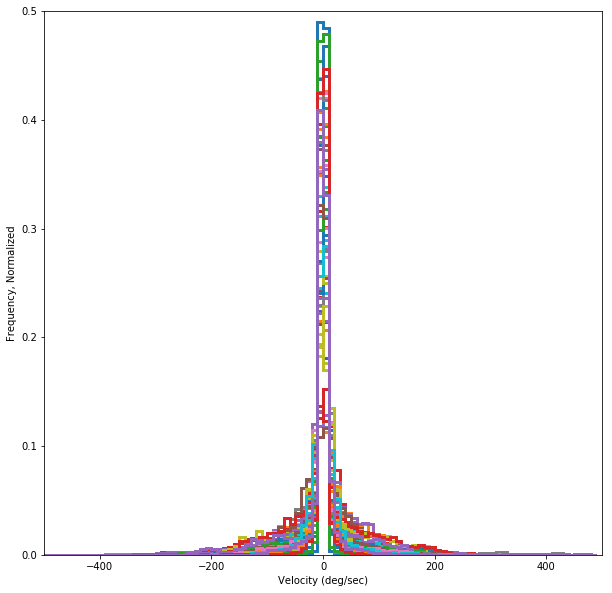

In [9]:
#############################
### Plot Angular Velocity ###
#############################

fig = plt.figure(figsize=(10, 10))
bins = np.ndarray.tolist(np.arange(-500,500,10))
count=0
for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                count +=1
                vector = fly.av * 100 # now in deg per sec
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')

plt.xlim(-500,500)
plt.ylim(0,.5)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
plt.show()

In [126]:
count

55

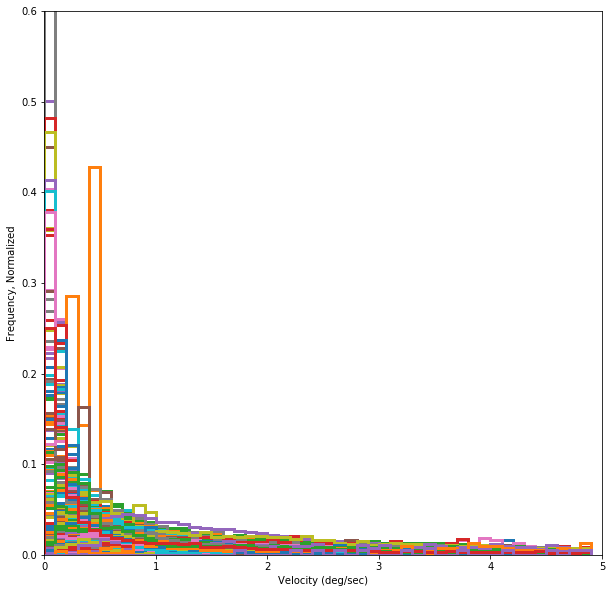

In [10]:
#############################
### Plot Forward Velocity ###
#############################
count = 0
fig = plt.figure(figsize=(10, 10))
bins = np.ndarray.tolist(np.arange(0,5,.1))
for k, fly in enumerate(flies):
    if fly.x is not None and fly.y is not None:
        count +=1
        #vector = fly.av
        #weights = np.ones_like(vector)/float(len(vector))
        #binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
        vector = fly.v * 100 * 100 *100
        #vector = vector * 50 # now in deg per sec
        weights = np.ones_like(vector)/float(len(vector))
        binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
        #binned_data.append(binned)

#plt.title('Visual Stimuli')
plt.xlim(0,5)
plt.ylim(0,.6)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
#plt.plot(0.32405,0.3207,'ko',markersize=10)
plt.show()

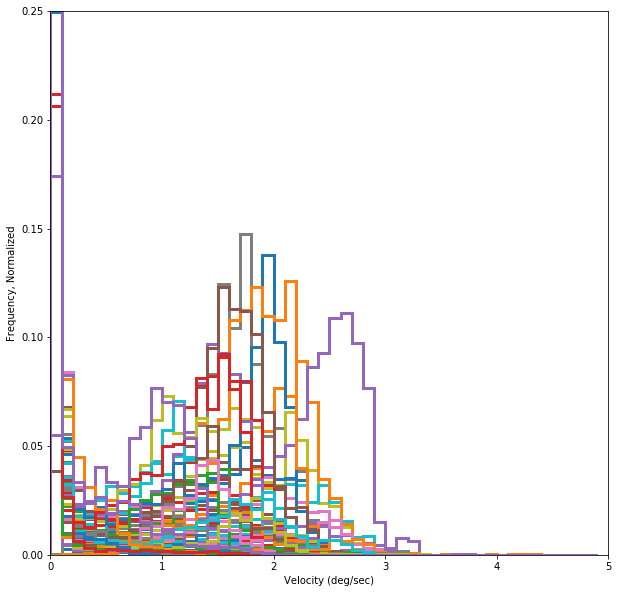

In [18]:
#############################
### Plot Forward Velocity ###
#############################

fig = plt.figure(figsize=(10, 10))
bins = np.ndarray.tolist(np.arange(0,5,.1))
count = 0
binned_data = []
for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                count += 1
                #vector = fly.av
                #weights = np.ones_like(vector)/float(len(vector))
                #binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
                vector = fly.v * 100 * 100
                #vector = vector * 50 # now in deg per sec
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, linewidth=3,histtype = 'step')
                binned_data.append(binned)

#plt.title('Visual Stimuli')
plt.xlim(0,5)
plt.ylim(0,.25)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
#plt.plot(0.32405,0.3207,'ko',markersize=10)
plt.show()

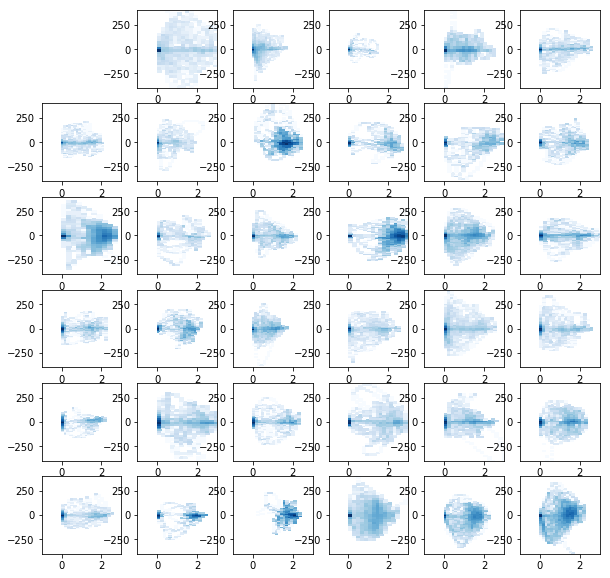

In [48]:
plt.figure(figsize=(10,10))
count = 0
for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type and count < 35:
                count += 1
                #print(count)
                plt.subplot(6,6,count+1)
                plt.hist2d(fly.v * 100 * 100,
                           fly.av * 100,
                           bins=[17,40],cmap='Blues',norm=mpl.colors.LogNorm());
                plt.ylim(-400,400)
                plt.xlim(-1,3)
                #plt.title('{}'.format(fly))
                #vector = fly.av
                #weights = np.ones_like(vector)/float(len(vector))
                #binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)
                vector = fly.v * 100 * 100

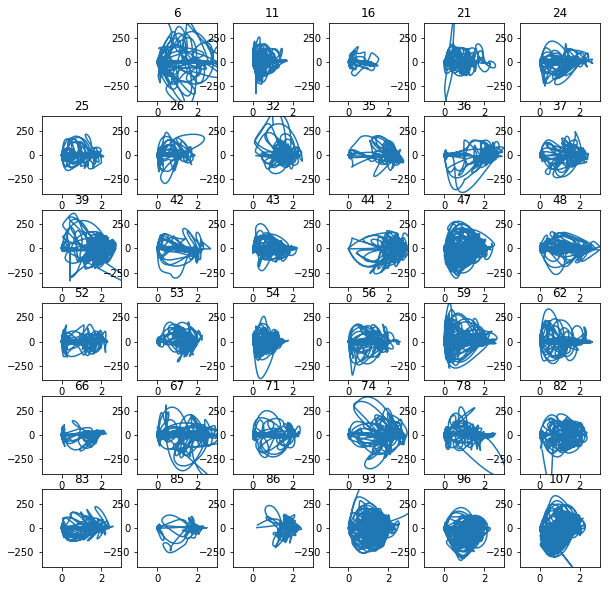

In [50]:
plt.figure(figsize=(10,10))
count = 0
for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type and count < 35:
                count += 1
                #print(count)
                plt.subplot(6,6,count+1)
                plt.plot(fly.v * 100 * 100,
                           fly.av * 100)
                plt.ylim(-400,400)
                plt.xlim(-1,3)
                plt.title('{}'.format(k))
                #vector = fly.av
                #weights = np.ones_like(vector)/float(len(vector))
                #binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label = str(i),stacked=True, histtype = 'step',linewidth=3)

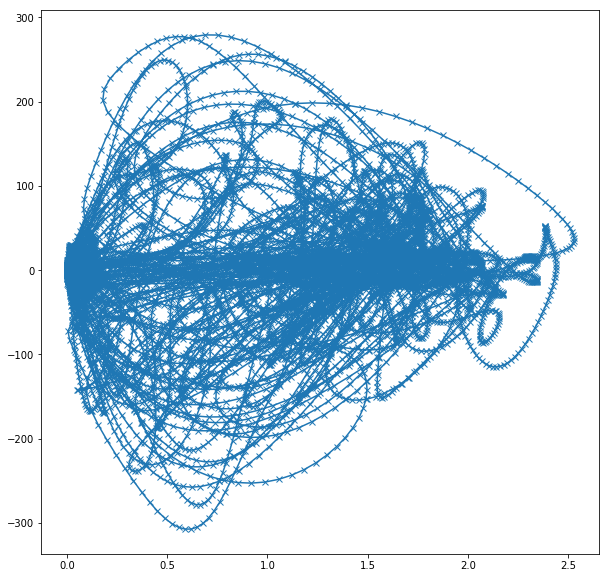

In [55]:
plt.figure(figsize=(10,10))
plt.plot(flies[47].v * 100 * 100, flies[47].av * 100, marker='x')

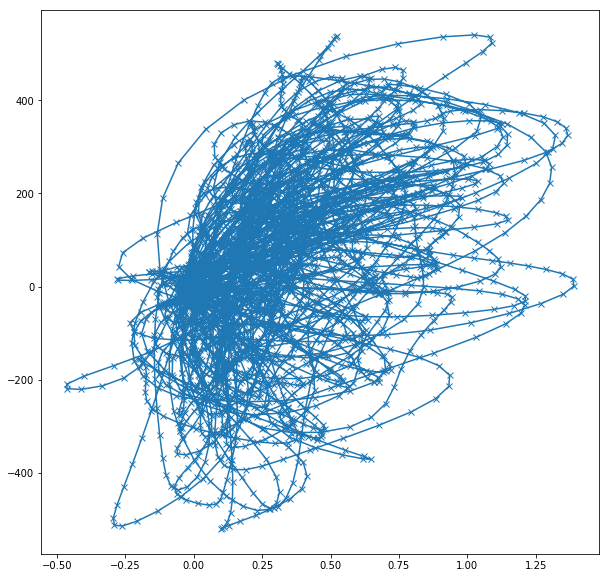

In [78]:
plt.figure(figsize=(10,10))
sphere_radius = 4.5e-3
sigma = 3
x = scipy.ndimage.filters.gaussian_filter1d(fictracs[0]['dRotLabY'][5000:10000]*sphere_radius*50*100,sigma)
y = scipy.ndimage.filters.gaussian_filter1d(np.rad2deg(fictracs[0]['dRotLabZ'][5000:10000])*50,sigma)
plt.plot(x,y,marker='x')
#plt.ylim(-500,500)
#plt.xlim(-1,2)
plt.show()

In [56]:
flies = [71,72]
fictracs = []
root_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'
for fly in flies:
    funcs = []
    fly_dir = os.path.join(root_path, 'fly_{}'.format(fly))
    funcs = os.listdir(fly_dir)
    for func in funcs:
        try:
            fictrac = bbb.load_fictrac(os.path.join(fly_dir, func, 'fictrac'))
            fictracs.append(fictrac)
            print(fly)
        except:
            pass


~~ load_fictrac ~~
load_fictrac done. Duration: 3.27 sec
71

~~ load_fictrac ~~

~~ load_fictrac ~~

~~ load_fictrac ~~
load_fictrac done. Duration: 3.18 sec
72

~~ load_fictrac ~~

~~ load_fictrac ~~


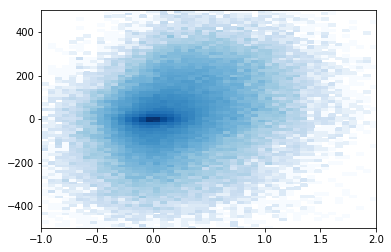

In [58]:
sphere_radius = 4.5e-3
plt.hist2d(fictracs[0]['dRotLabY']*sphere_radius*50*100,
           np.rad2deg(fictracs[0]['dRotLabZ'])*50,
           bins=100,cmap='Blues',norm=mpl.colors.LogNorm());
plt.ylim(-500,500)
plt.xlim(-1,2)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(flies[47].v * 100 * 100, flies[47].av * 100, marker='x')

In [27]:
plt.figure(figsize=(10,10))
for i,fly in enumerate(fictrac_good_processed):
    plt.subplot(6,6,i+1)
    plt.hist2d(fictrac_good_processed[fly]['dy'],
               fictrac_good_processed[fly]['dz'],
               bins=[17,40],cmap='Blues',norm=mpl.colors.LogNorm());
    plt.ylim(-200,200)
    plt.xlim(-1,2)
    plt.title('{}'.format(fly))

array([6.11652739e-01, 3.44593633e-02, 1.19862610e-02, 9.30756649e-03,
       9.68443554e-03, 9.32900359e-03, 9.57061081e-03, 1.07699104e-02,
       1.19619331e-02, 1.38046186e-02, 1.57013341e-02, 1.77929048e-02,
       1.88590569e-02, 2.18833104e-02, 2.31072173e-02, 2.41538040e-02,
       2.29725041e-02, 2.27799936e-02, 2.01167371e-02, 1.76513619e-02,
       1.40819555e-02, 1.25896135e-02, 9.74570881e-03, 6.98088840e-03,
       5.31199944e-03, 4.47845857e-03, 3.55380917e-03, 2.63508836e-03,
       1.90697303e-03, 5.39990288e-04, 1.83077553e-04, 2.59149705e-04,
       1.44993865e-04, 1.10898775e-05, 5.23835834e-06, 4.72693281e-06,
       2.89427224e-06, 5.69169022e-06, 0.00000000e+00, 2.79741798e-06,
       1.39870899e-06, 2.79741798e-06, 4.19612697e-06, 2.79741798e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [26]:
binned_data

[array([9.71171249e-01, 2.76250271e-03, 1.71465685e-03, 1.74063650e-03,
        1.27300281e-03, 1.55011907e-03, 1.51547954e-03, 8.40008660e-04,
        7.62069712e-04, 7.79389478e-04, 9.17947608e-04, 6.84130764e-04,
        8.22688894e-04, 9.00627842e-04, 9.43927257e-04, 7.70729595e-04,
        7.36090063e-04, 7.27430180e-04, 6.23511583e-04, 1.15176445e-03,
        5.88872050e-04, 6.14851700e-04, 1.08248539e-03, 7.53409829e-04,
        5.54232518e-04, 5.62892401e-04, 4.67633687e-04, 9.17947608e-04,
        5.62892401e-04, 2.85776142e-04, 3.55055207e-04, 3.89694739e-04,
        2.77116259e-04, 1.21238363e-04, 7.79389478e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array([9.00948943e-01, 3.42477834e-02, 1.63625032e-02, 1.09475318e-02,
        9.37771924e-03, 7.20232356e-03

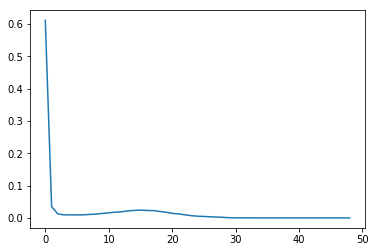

In [28]:
plt.plot(out)

(array([1.100e+01, 4.500e+01, 2.040e+02, 2.044e+03, 8.850e+03, 2.590e+02,
        6.400e+01, 1.400e+01, 1.000e+00, 3.000e+00]),
 array([-2.53559162, -1.92421316, -1.31283471, -0.70145625, -0.0900778 ,
         0.52130066,  1.13267911,  1.74405757,  2.35543603,  2.96681448,
         3.57819294]),
 <a list of 10 Patch objects>)

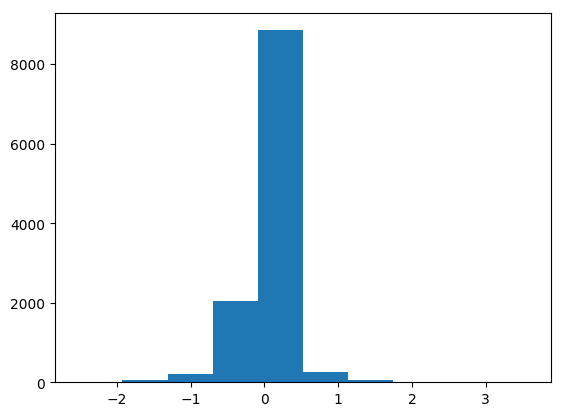

In [42]:
plt.hist(flies[1].av)

(-0.0002, 0.0002)

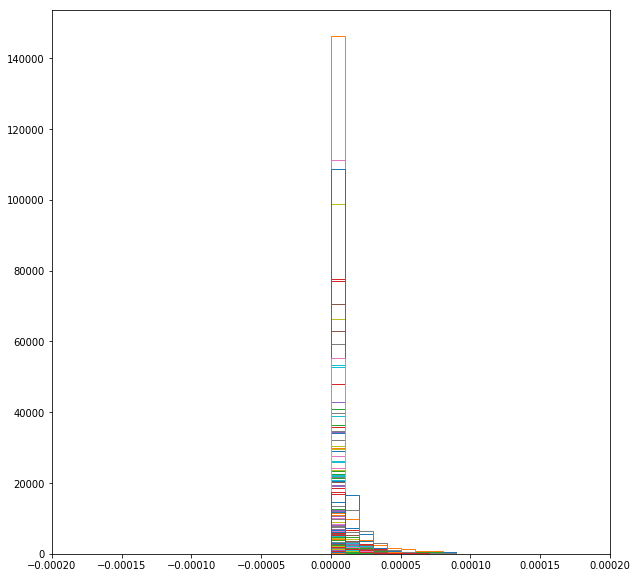

In [55]:
#bins = np.ndarray.tolist(np.arange(-.0001,.0001,.00001))
fig = plt.figure(figsize=(10,10))
for i in range(len(flies)):
    plt.hist(flies[i].v,bins=bins,histtype='step');
plt.xlim(-.0002,.0002)

NameError: name 'OrderedDict' is not defined

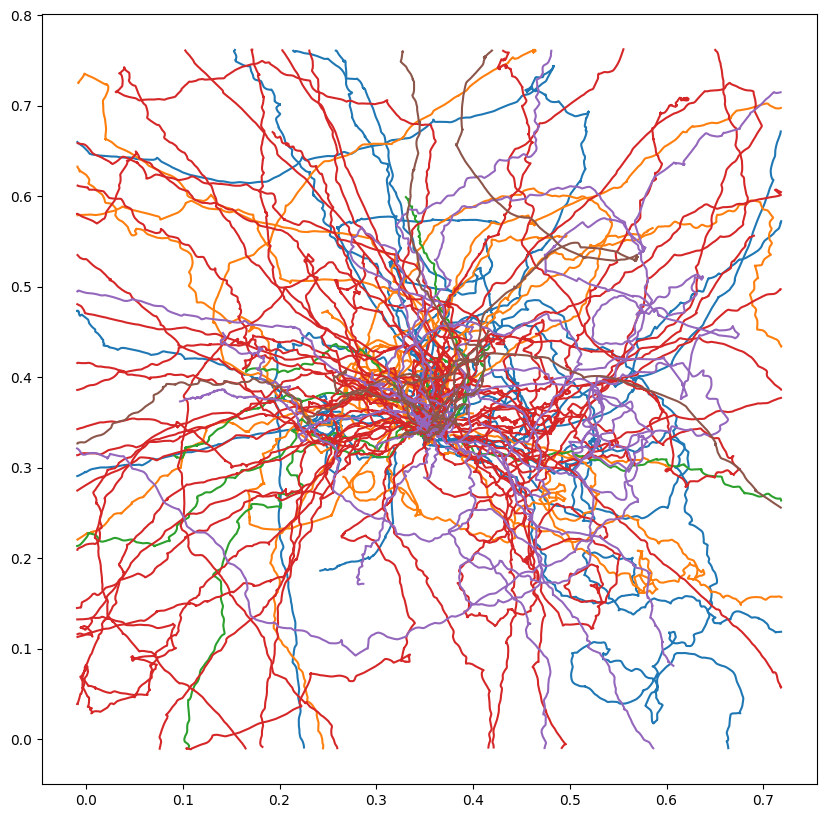

In [39]:
############
### Plot ###
############

plt.style.use('default')
fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, type in enumerate(types):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                plt.plot(fly.x, fly.y,
                         label = '{} ({} {})'.format(type, len([fly for fly in flies if fly.type == type]), 'flies'),
                         color = colors[i])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Visual Stimuli')
plt.xlim(0,.72)
plt.ylim(0,.75)
#plt.plot(0.32405,0.3207,'ko',markersize=10)
plt.show()